# From scratch neural network

## Coding a neuron

In [2]:
import numpy as np

def sigmoid(x):
    #activation function
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        #attributes of Neuron class
        self.weights = weights
        self.bias = bias
        
    #method that implements the core calculation of a neuron    
    def feedforward(self, inputs):
        #multipy inputs by weights, then add bias, then use activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

In [8]:
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)

x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


## A simiple neural network

In [15]:
import numpy as np

def sigmoid(x):
    #activation function
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        #attributes of Neuron class
        self.weights = weights
        self.bias = bias
        
    #method that implements the core calculation of a neuron    
    def feedforward(self, inputs):
        #multipy inputs by weights, then add bias, then use activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:
    '''
    A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        #attributes of NeuralNetwork class
        weights = np.array([0, 1])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x) #using feedforward method defined in Neuron class
        out_h2 = self.h2.feedforward(x)

        # The inputs for o1 are the outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

In [17]:
network = NeuralNetwork()
x = np.array([2, 3]) #inputs
print(network.feedforward(x))

0.7216325609518421


## Train network (minimize the loss)
change the networks weights and biases in a way that minimizes the loss

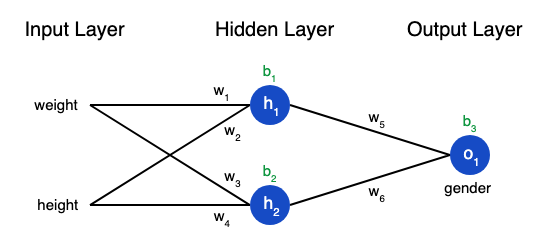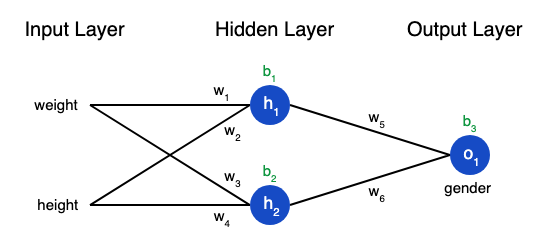

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)
    
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class NeuralNetwork:
    '''
    A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        # randomly initialize weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # randomly initialize biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        # core calculation of neuron: multipy inputs by weights, then add bias, then use activation function (sigmoid)
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues, learn_rate, epochs):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
          Elements in all_y_trues correspond to those in data.
        '''
        
        learn_rate = learn_rate
        epochs = epochs # number of times to loop through the entire dataset

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                #we neeed intermediate values from feedforward for backpropogation calculation
                #using feedforward method defined earlier would only return the output
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
            
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                #calculate partial derivatives
                #L = loss
                d_L_d_ypred = -2 * (y_true - y_pred) #deriv of loss function

                #backpropogation starts with last neuron (o1, here)
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                #Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                #Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                #Update weights and biases using calculated partial derivatives
                #Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                #Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                #Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            #check performance every 10 epochs 
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data) #feedforward function applied to each row (axis 1) of the data array
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))

In [13]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train neural network
network = NeuralNetwork()
network.train(data, all_y_trues, learn_rate = 0.1, epochs = 1000)

Epoch 0 loss: 0.408
Epoch 10 loss: 0.285
Epoch 20 loss: 0.186
Epoch 30 loss: 0.125
Epoch 40 loss: 0.089
Epoch 50 loss: 0.067
Epoch 60 loss: 0.052
Epoch 70 loss: 0.042
Epoch 80 loss: 0.035
Epoch 90 loss: 0.030
Epoch 100 loss: 0.026
Epoch 110 loss: 0.023
Epoch 120 loss: 0.020
Epoch 130 loss: 0.018
Epoch 140 loss: 0.016
Epoch 150 loss: 0.015
Epoch 160 loss: 0.014
Epoch 170 loss: 0.013
Epoch 180 loss: 0.012
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.009
Epoch 230 loss: 0.009
Epoch 240 loss: 0.008
Epoch 250 loss: 0.008
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.007
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.006
Epoch 330 loss: 0.006
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.005
Epoch 390 loss: 0.005
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

## Use trained network to make predictions

In [29]:
# Make prediction of gender based on weight and height
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print(f"Emily: {network.feedforward(emily):.3f}") # values close to 1 - F
print(f"Frank: {network.feedforward(frank):.3f}") # values close to 0 - M

Emily: 0.966
Frank: 0.039
